<a href="https://colab.research.google.com/github/markmbadham/jess_assignment2/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#rm(list=ls())
#setwd("~/Assignment 2")
install.packages("lmtest")
install.packages("tseries")
install.packages("dplyr")
install.packages("stargazer")
library(lmtest) 
library(tseries)
library(dplyr)
library(stargazer) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.



# Cleaning
## GDP cleaning

In [15]:
clean <- function(name, filename) {
  df <- read.csv(filename)
  df <- df[, -c(2,3,4)]
  colnames(df) <- c("date", name)
  df$date <- as.Date(as.yearmon(df$date, "%Y/%m"))
  df.ts <- ts(df[name], start = c(1960,1), frequency = 12) 
  df.ts <- aggregate(df.ts, nfrequency = 4, FUN = sum)
  df$year <- substr(df$date, 1, 4)
  df$year <- as.integer(df$year)
  return <- df

}
# gdp <- read.csv("data/GDP_time_series.csv")
# gdp <- gdp[,-c(2,3,4)]
# colnames(gdp) <- c("date", "gdp")
# gdp$date <- as.Date(as.yearmon(gdp$date, "%Y/%m"))

# gdp.ts <- ts(gdp$gdp, start = c(1960,1), frequency = 12) 
# gdp.ts <- aggregate(gdp.ts, nfrequency = 4, FUN = sum)

# gdp$year <- substr(gdp$date, 1, 4)
# gdp$year <- as.integer(gdp$year)
gdp <- clean("gdp", "data/GDP_time_series.csv") 

In [16]:
summary(gdp)

      date                 gdp               year     
 Min.   :1960-01-01   Min.   : 565040   Min.   :1960  
 1st Qu.:1975-01-24   1st Qu.:1203106   1st Qu.:1975  
 Median :1990-02-15   Median :1612666   Median :1990  
 Mean   :1990-02-15   Mean   :1766314   Mean   :1990  
 3rd Qu.:2005-03-08   3rd Qu.:2385473   3rd Qu.:2005  
 Max.   :2020-04-01   Max.   :3161917   Max.   :2020  

## Investment cleaning

In [17]:
# inv <- read.csv("data/GFC_time_series.csv")
# inv <- inv[,-c(2,3,4)]
# colnames(inv) <- c("date", "inv")
# inv$date <- as.Date(as.yearmon(inv$date, "%Y/%m"))
# inv$year <- substr(inv$date, 1, 4)
# inv$year <- as.integer(inv$year)

inv <- clean("inv", "data/GFC_time_series.csv")

In [18]:
summary(inv)

      date                 inv              year     
 Min.   :1960-01-01   Min.   : 73065   Min.   :1960  
 1st Qu.:1975-01-24   1st Qu.:202294   1st Qu.:1975  
 Median :1990-02-15   Median :253028   Median :1990  
 Mean   :1990-02-15   Mean   :307074   Mean   :1990  
 3rd Qu.:2005-03-08   3rd Qu.:418890   3rd Qu.:2005  
 Max.   :2020-04-01   Max.   :644549   Max.   :2020  

## Consumption cleaning

In [19]:
# cons <- read.csv("data/HCE_time_series.csv")
# cons <- cons[,-c(2,3,4)]
# colnames(cons) <- c("date", "cons")
# cons$date <- as.Date(as.yearmon(cons$date, "%Y/%m"))
# cons$year <- substr(cons$date, 1, 4)
# cons$year <- as.integer(cons$year)
cons <- clean("cons", "data/HCE_time_series.csv") 

In [20]:
head(cons)

,date,cons,year
,<date>,<int>,<int>
1,1960-01-01,260612,1960
2,1960-02-01,264774,1960
3,1960-03-01,270153,1960
4,1960-04-01,269545,1960
5,1961-01-01,272785,1961
6,1961-02-01,271143,1961


In [21]:
summary(cons)

      date                 cons              year     
 Min.   :1960-01-01   Min.   : 260612   Min.   :1960  
 1st Qu.:1975-01-24   1st Qu.: 564704   1st Qu.:1975  
 Median :1990-02-15   Median : 843666   Median :1990  
 Mean   :1990-02-15   Mean   : 970466   Mean   :1990  
 3rd Qu.:2005-03-08   3rd Qu.:1380697   3rd Qu.:2005  
 Max.   :2020-04-01   Max.   :1966430   Max.   :2020  

## Government spending

In [22]:
# gov <- read.csv("data/GCE_time_series.csv")
# gov <- gov[,-c(2,3,4)]
# colnames(gov) <- c("date", "gov")
# gov$date <- as.Date(as.yearmon(gov$date, "%Y/%m"))
# gov$year <- substr(gov$date, 1, 4)
# gov$year <- as.integer(gov$year)
gov <- clean("gov", "data/GCE_time_series.csv")

In [23]:
head(gov)

,date,gov,year
,<date>,<int>,<int>
1,1960-01-01,65991,1960
2,1960-02-01,71373,1960
3,1960-03-01,68838,1960
4,1960-04-01,70451,1960
5,1961-01-01,70655,1961
6,1961-02-01,71834,1961


## Trade balance

In [24]:
summary(gov)

      date                 gov              year     
 Min.   :1960-01-01   Min.   : 65991   Min.   :1960  
 1st Qu.:1975-01-24   1st Qu.:186390   1st Qu.:1975  
 Median :1990-02-15   Median :328101   Median :1990  
 Mean   :1990-02-15   Mean   :330350   Mean   :1990  
 3rd Qu.:2005-03-08   3rd Qu.:451534   3rd Qu.:2005  
 Max.   :2020-04-01   Max.   :656056   Max.   :2020  

In [25]:
nx <- read.csv("data/NX_time_series.csv")
head(nx)

,Date,Code,Description,Unit.of.Measure,Value
,<chr>,<chr>,<chr>,<chr>,<int>
1,1960/01,KBP5010L,Balance of Payments: Trade balance,R millions,335
2,1960/02,KBP5010L,Balance of Payments: Trade balance,R millions,245
3,1960/03,KBP5010L,Balance of Payments: Trade balance,R millions,220
4,1960/04,KBP5010L,Balance of Payments: Trade balance,R millions,280
5,1961/01,KBP5010L,Balance of Payments: Trade balance,R millions,337
6,1961/02,KBP5010L,Balance of Payments: Trade balance,R millions,343


# Merging 1

In [26]:
merged <- dplyr::full_join(gdp, inv, by = "year")

merged_2 <- dplyr::full_join(merged, cons, by = "year")

full_dataset <- dplyr::full_join(merged_2, gov, by = "year")

In [27]:
head(full_dataset)

,date.x,gdp,year,date.y,inv,date.x.x,cons,date.y.y,gov
,<date>,<int>,<int>,<date>,<int>,<date>,<int>,<date>,<int>
1,1960-01-01,565040,1960,1960-01-01,81095,1960-01-01,260612,1960-01-01,65991
2,1960-01-01,565040,1960,1960-01-01,81095,1960-01-01,260612,1960-02-01,71373
3,1960-01-01,565040,1960,1960-01-01,81095,1960-01-01,260612,1960-03-01,68838
4,1960-01-01,565040,1960,1960-01-01,81095,1960-01-01,260612,1960-04-01,70451
5,1960-01-01,565040,1960,1960-01-01,81095,1960-02-01,264774,1960-01-01,65991
6,1960-01-01,565040,1960,1960-01-01,81095,1960-02-01,264774,1960-02-01,71373


In [ ]:
summary(full_dataset)

     date.x                gdp               year          date.y          
 Min.   :1960-01-01   Min.   : 565040   Min.   :1960   Min.   :1960-01-01  
 1st Qu.:1975-01-24   1st Qu.:1203106   1st Qu.:1975   1st Qu.:1975-01-24  
 Median :1990-02-15   Median :1612666   Median :1990   Median :1990-02-15  
 Mean   :1990-02-15   Mean   :1766314   Mean   :1990   Mean   :1990-02-15  
 3rd Qu.:2005-03-08   3rd Qu.:2385473   3rd Qu.:2005   3rd Qu.:2005-03-08  
 Max.   :2020-04-01   Max.   :3161917   Max.   :2020   Max.   :2020-04-01  
      inv            date.x.x               cons            date.y.y         
 Min.   : 73065   Min.   :1960-01-01   Min.   : 260612   Min.   :1960-01-01  
 1st Qu.:202294   1st Qu.:1975-01-24   1st Qu.: 564704   1st Qu.:1975-01-24  
 Median :253028   Median :1990-02-15   Median : 843666   Median :1990-02-15  
 Mean   :307074   Mean   :1990-02-15   Mean   : 970466   Mean   :1990-02-15  
 3rd Qu.:418890   3rd Qu.:2005-03-08   3rd Qu.:1380697   3rd Qu.:2005-03-08  


# Descriptive statistics

In [ ]:
stargazer(full_dataset[,-c(1,3,4,6,8)], type = "text", median = T, flip = T, out = "summary_stats.html")


Statistic      gdp          inv        cons         gov    
-----------------------------------------------------------
N            15,616       15,616      15,616      15,616   
Mean      1,766,314.000 307,074.000 970,465.800 330,350.100
St. Dev.   763,589.900  167,280.500 520,882.400 175,351.300
Min          565,040      73,065      260,612     65,991   
Pctl(25)    1,203,106    202,293.8   564,703.5   186,390.2 
Median     1,612,666.0    253,028    843,666.5    328,101  
Pctl(75)   2,385,473.0   418,890.5  1,380,697.0   451,534  
Max         3,161,917     644,549    1,966,430    656,056  
-----------------------------------------------------------


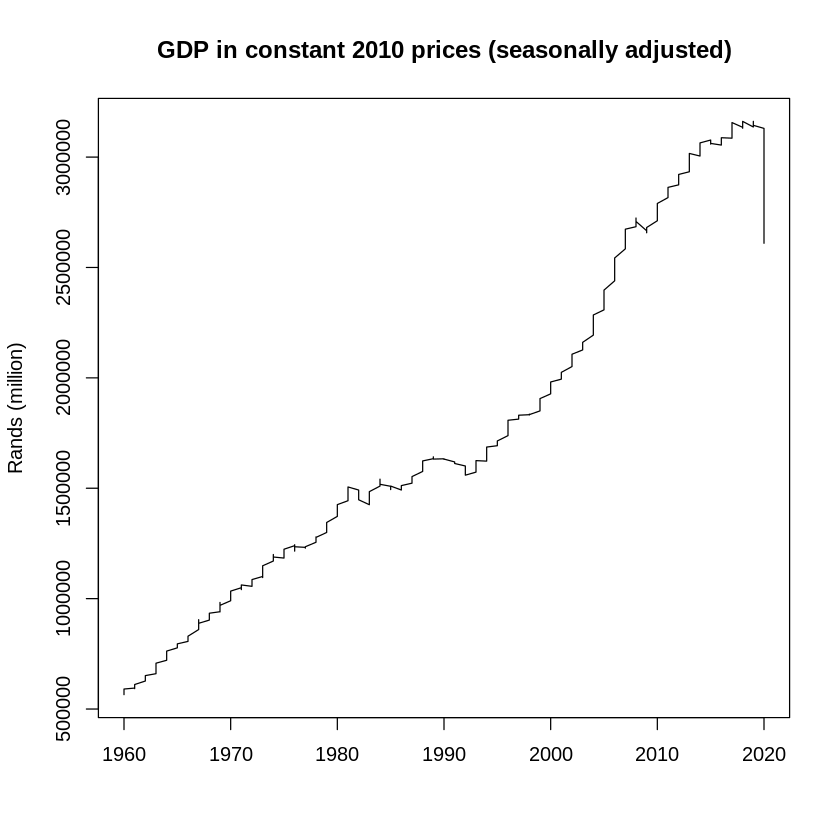

In [ ]:
plot(x = gdp$year,
     y = gdp$gdp,
     main = "GDP in constant 2010 prices (seasonally adjusted)",
     ylab = "Rands (million)",
     xlab = "",
     type = "l")

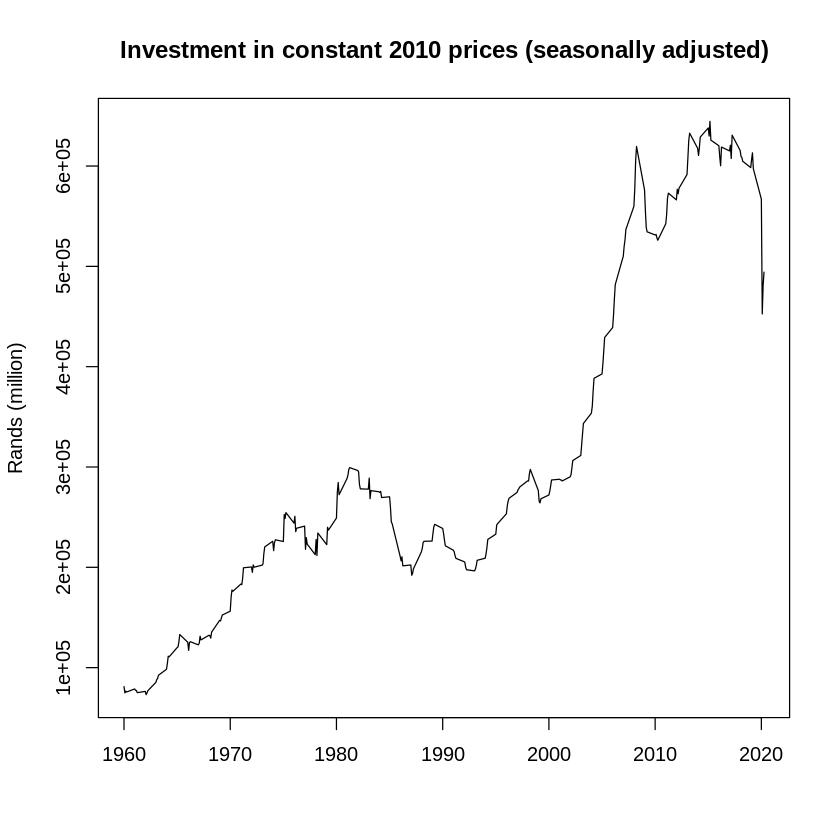

In [ ]:
plot(x = inv$date,
     y = inv$inv,
     main = "Investment in constant 2010 prices (seasonally adjusted)",
     ylab = "Rands (million)",
     xlab = "",
     type = "l")

## Diagnostics for GDP


                        Dependent variable:    
                    ---------------------------
                                gdp            
-----------------------------------------------
t                          10,503.300***       
                             (152.724)         
                                               
Constant                  475,006.000***       
                           (20,522.770)        
                                               
-----------------------------------------------
Observations                    232            
R2                             0.954           
Adjusted R2                    0.953           
Residual Std. Error   155,791.800 (df = 230)   
F Statistic         4,729.737*** (df = 1; 230) 
Note:               *p<0.1; **p<0.05; ***p<0.01


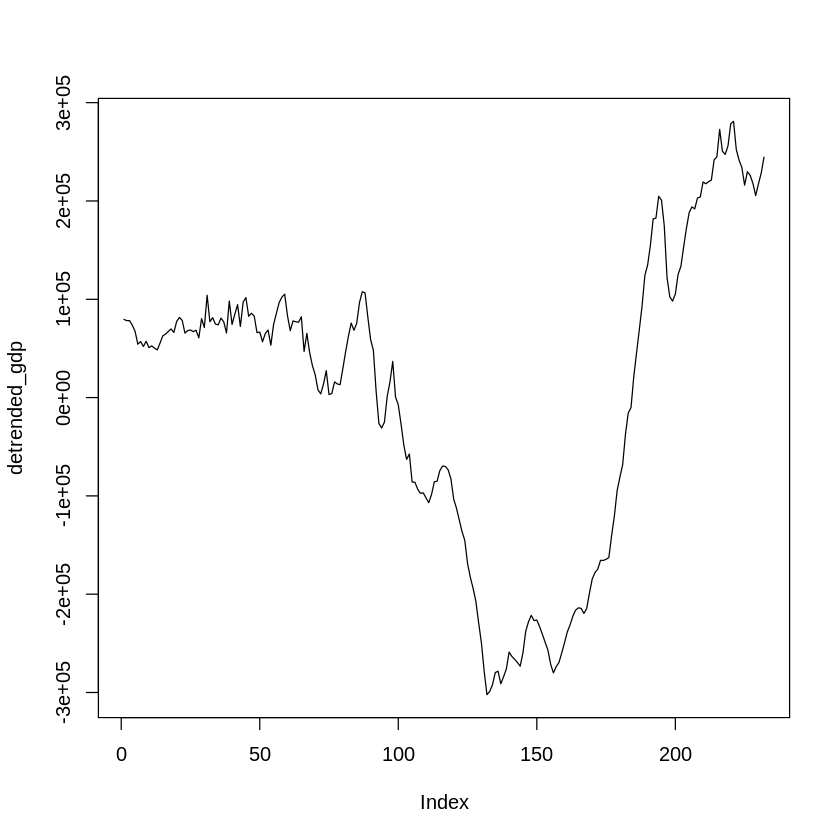

In [ ]:
gdp_sample <- gdp[which(gdp$year < 2018),]
gdp_sample$t <- 1:nrow(gdp_sample)

time_trend_reg1 <- lm(gdp ~ t, data = gdp_sample)
stargazer(time_trend_reg1, type = "text")
#t is highly significant, R2 is 95%

detrended_gdp <- time_trend_reg1$residuals
plot(detrended_gdp, type = "l")

## Differencing

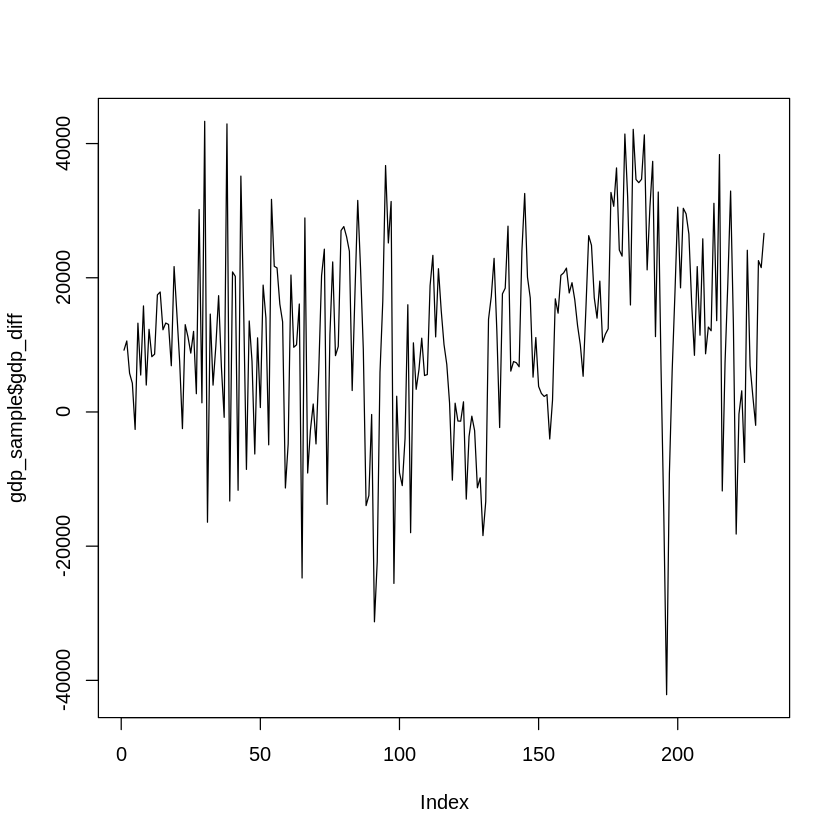

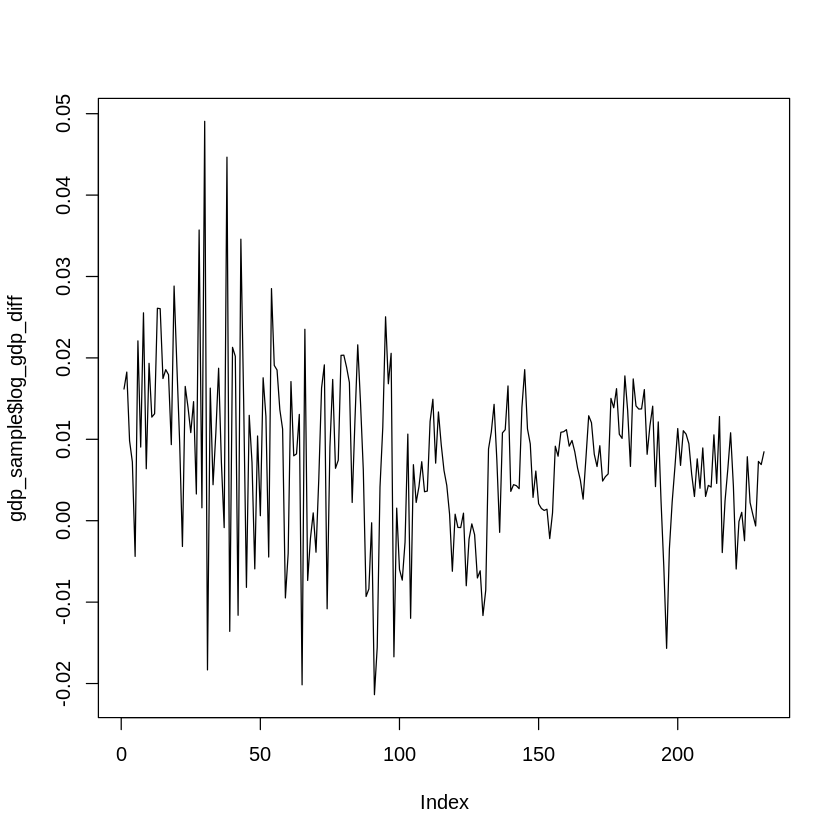

In [ ]:
gdp_sample$gdp_diff <- gdp_sample$gdp - dplyr::lag(gdp_sample$gdp, 1)
gdp_sample$log_gdp_diff <- log(gdp_sample$gdp) - dplyr::lag(log(gdp_sample$gdp), 1)

gdp_sample <- gdp_sample[-1,]

plot(gdp_sample$gdp_diff, type = "l")
plot(gdp_sample$log_gdp_diff, type = "l")
#no clear time trend anymore, constant mean but var?

## Dickey Fuller Test

In [ ]:
adf.test(gdp_sample$gdp, k = 4)
# t stat is -0.59... p value is 0.98

adf.test(detrended_gdp, k = 4)
#slightly higher t stat of -0.61, still very high p

adf.test(gdp_sample$gdp_diff, k = 4)
# -5.54, p  value less than 0.01

adf.test(gdp_sample$log_gdp_diff, k = 4)
#-5.65, p < 0.01

#Unit root can be rejected at 1% level


	Augmented Dickey-Fuller Test

data:  gdp_sample$gdp
Dickey-Fuller = -0.59453, Lag order = 4, p-value = 0.9769
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  detrended_gdp
Dickey-Fuller = -0.61386, Lag order = 4, p-value = 0.9761
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$gdp_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$gdp_diff
Dickey-Fuller = -5.5382, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$log_gdp_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$log_gdp_diff
Dickey-Fuller = -5.6465, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


## Robust to choices of k

In [ ]:
adf.test(gdp_sample$gdp_diff, k = 1)
adf.test(gdp_sample$log_gdp_diff, k = 1)


adf.test(gdp_sample$gdp_diff, k = 2)
adf.test(gdp_sample$log_gdp_diff, k = 2)


adf.test(gdp_sample$gdp_diff, k = 8)
adf.test(gdp_sample$log_gdp_diff, k = 8)

#all show p < 0.01

Warning message in adf.test(gdp_sample$gdp_diff, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$gdp_diff
Dickey-Fuller = -6.991, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$log_gdp_diff, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$log_gdp_diff
Dickey-Fuller = -7.8154, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$gdp_diff, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$gdp_diff
Dickey-Fuller = -6.1392, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$log_gdp_diff, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$log_gdp_diff
Dickey-Fuller = -6.0784, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$gdp_diff, k = 8):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$gdp_diff
Dickey-Fuller = -4.3804, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gdp_sample$log_gdp_diff, k = 8):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gdp_sample$log_gdp_diff
Dickey-Fuller = -4.1733, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


## Diagnostics for investment


                        Dependent variable:    
                    ---------------------------
                                inv            
-----------------------------------------------
t                          2,115.280***        
                             (72.432)          
                                               
Constant                   47,008.530***       
                            (9,733.273)        
                                               
-----------------------------------------------
Observations                    232            
R2                             0.788           
Adjusted R2                    0.787           
Residual Std. Error    73,886.890 (df = 230)   
F Statistic          852.856*** (df = 1; 230)  
Note:               *p<0.1; **p<0.05; ***p<0.01



	Augmented Dickey-Fuller Test

data:  inv_sample$inv
Dickey-Fuller = -1.1172, Lag order = 4, p-value = 0.9179
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  detrended_inv
Dickey-Fuller = -1.1172, Lag order = 4, p-value = 0.9179
alternative hypothesis: stationary


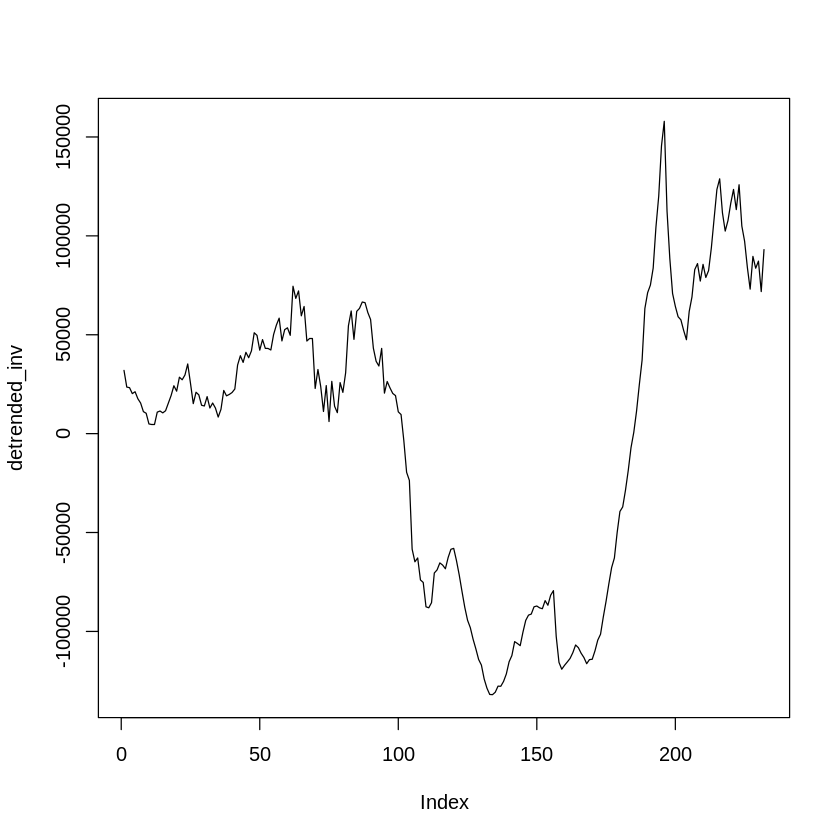

In [ ]:
inv_sample <- inv[which(inv$year < 2018),]
inv_sample$t <- 1:nrow(inv_sample)

time_trend_reg2 <- lm(inv ~ t, data = inv_sample)
stargazer(time_trend_reg2, type = "text")

detrended_inv <- time_trend_reg2$residuals
plot(detrended_inv, type = "l")
#still shows trends in data

#testing for unit root

adf.test(inv_sample$inv, k = 4)
adf.test(detrended_inv, k = 4)
#both show evidence of a unit root, same p value of 0.9179

## Differencing Investment

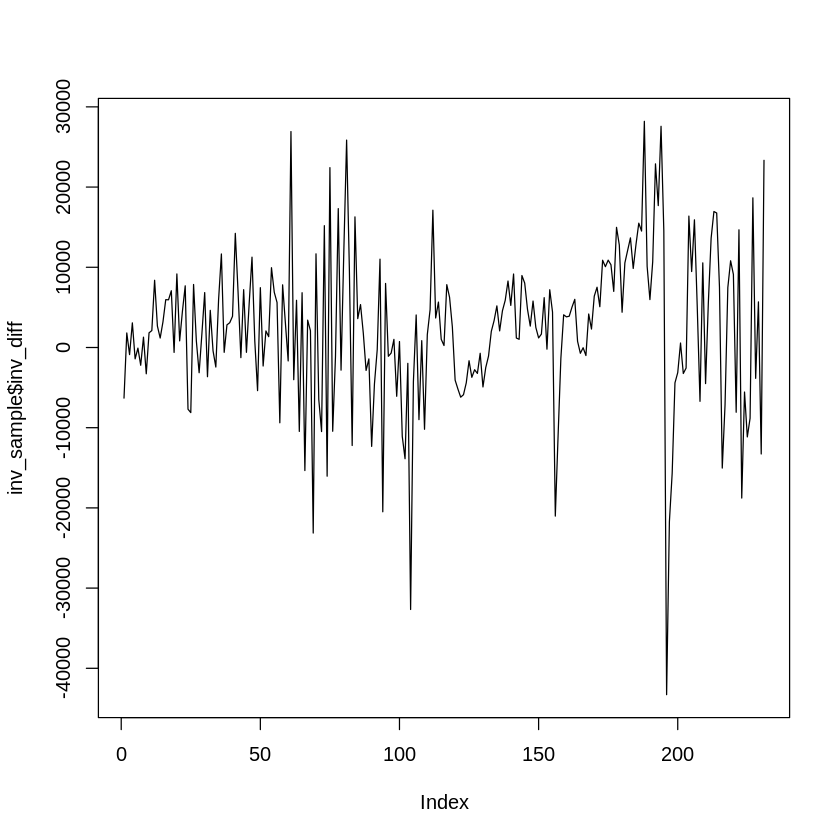

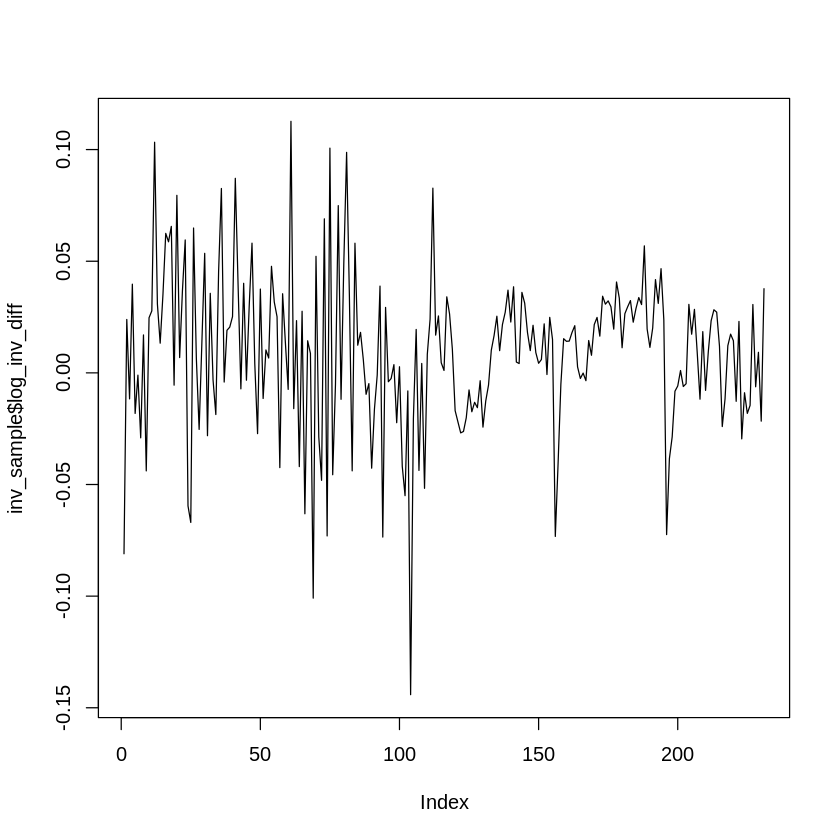

In [ ]:
#Differencing

inv_sample$inv_diff <- inv_sample$inv - dplyr::lag(inv_sample$inv, 1)
inv_sample$log_inv_diff <- log(inv_sample$inv) - dplyr::lag(log(inv_sample$inv), 1)

inv_sample <- inv_sample[-1,]

plot(inv_sample$inv_diff, type = "l")
plot(inv_sample$log_inv_diff, type = "l")



In [ ]:
#Test

adf.test(inv_sample$inv_diff, k = 4)
adf.test(inv_sample$log_inv_diff, k = 4)

#now p value < 0.01

Warning message in adf.test(inv_sample$inv_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$inv_diff
Dickey-Fuller = -5.1265, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$log_inv_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$log_inv_diff
Dickey-Fuller = -4.8399, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
# Robust to choices of k
adf.test(inv_sample$inv_diff, k = 1)
adf.test(inv_sample$log_inv_diff, k = 1)

adf.test(inv_sample$inv_diff, k = 2)
adf.test(inv_sample$log_inv_diff, k = 2)

adf.test(inv_sample$inv_diff, k = 8)
adf.test(inv_sample$log_inv_diff, k = 8)

Warning message in adf.test(inv_sample$inv_diff, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$inv_diff
Dickey-Fuller = -7.887, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$log_inv_diff, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$log_inv_diff
Dickey-Fuller = -8.5805, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$inv_diff, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$inv_diff
Dickey-Fuller = -6.4233, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$log_inv_diff, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$log_inv_diff
Dickey-Fuller = -6.0385, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$inv_diff, k = 8):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$inv_diff
Dickey-Fuller = -4.5725, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$log_inv_diff, k = 8):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$log_inv_diff
Dickey-Fuller = -4.9654, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



                        Dependent variable:    
                    ---------------------------
                               cons            
-----------------------------------------------
t                          7,062.156***        
                             (110.811)         
                                               
Constant                   98,846.080***       
                           (14,890.610)        
                                               
-----------------------------------------------
Observations                    232            
R2                             0.946           
Adjusted R2                    0.946           
Residual Std. Error   113,037.100 (df = 230)   
F Statistic         4,061.694*** (df = 1; 230) 
Note:               *p<0.1; **p<0.05; ***p<0.01



	Augmented Dickey-Fuller Test

data:  cons_sample$cons
Dickey-Fuller = -1.1289, Lag order = 4, p-value = 0.916
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  detrended_cons
Dickey-Fuller = -1.1289, Lag order = 4, p-value = 0.916
alternative hypothesis: stationary


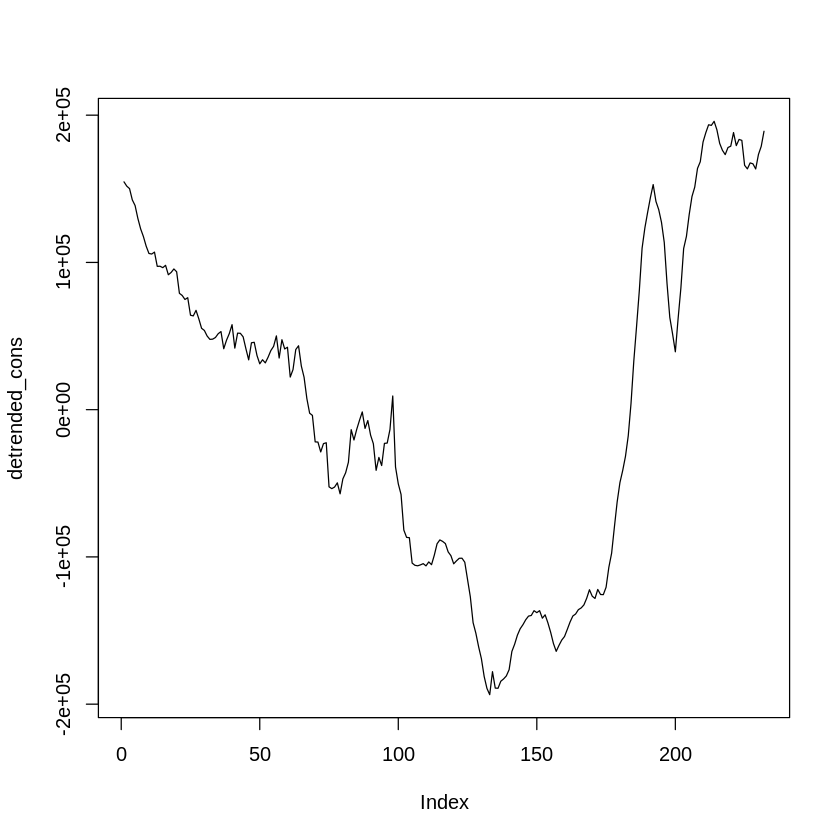

In [ ]:
#Diagnostics for Consumption

cons_sample <- cons[which(cons$year < 2018),]
cons_sample$t <- 1:nrow(cons_sample)

time_trend_reg3 <- lm(cons ~ t, data = cons_sample)
stargazer(time_trend_reg3, type = "text")
#95% explained by time...

detrended_cons <- time_trend_reg3$residuals
plot(detrended_cons, type = "l")
#still shows trends in data

#testing for unit root

adf.test(cons_sample$cons, k = 4)
adf.test(detrended_cons, k = 4)
#both show evidence of a unit root, same p value of 0.916

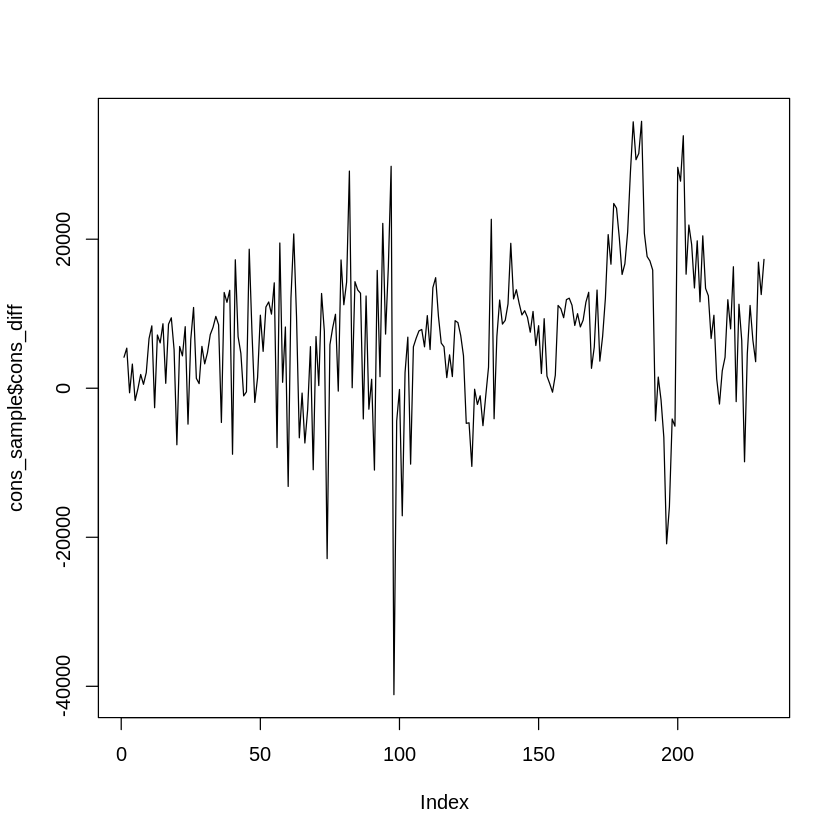

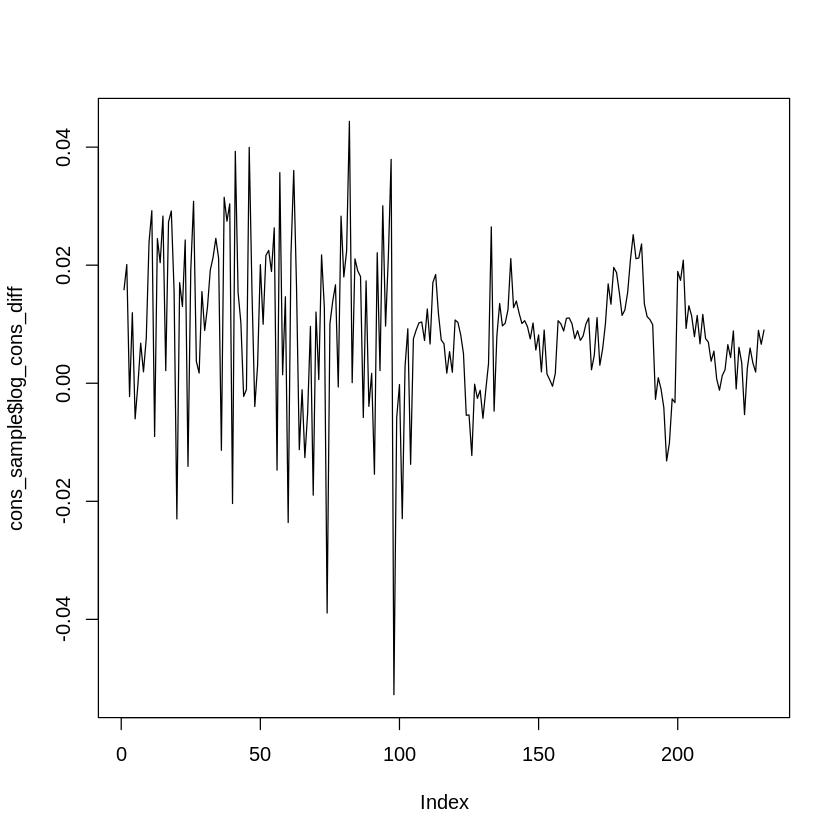

In [ ]:
#Differencing

cons_sample$cons_diff <- cons_sample$cons - dplyr::lag(cons_sample$cons, 1)
cons_sample$log_cons_diff <- log(cons_sample$cons) - dplyr::lag(log(cons_sample$cons), 1)

cons_sample <- cons_sample[-1,]

plot(cons_sample$cons_diff, type = "l")
plot(cons_sample$log_cons_diff, type = "l")

In [ ]:

#Test

adf.test(inv_sample$inv_diff, k = 4)
adf.test(inv_sample$log_inv_diff, k = 4)

#now p value < 0.01

Warning message in adf.test(inv_sample$inv_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$inv_diff
Dickey-Fuller = -5.1265, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(inv_sample$log_inv_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  inv_sample$log_inv_diff
Dickey-Fuller = -4.8399, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



                        Dependent variable:    
                    ---------------------------
                                gov            
-----------------------------------------------
t                          2,398.516***        
                             (31.241)          
                                               
Constant                   34,439.470***       
                            (4,198.121)        
                                               
-----------------------------------------------
Observations                    232            
R2                             0.962           
Adjusted R2                    0.962           
Residual Std. Error    31,868.630 (df = 230)   
F Statistic         5,894.309*** (df = 1; 230) 
Note:               *p<0.1; **p<0.05; ***p<0.01


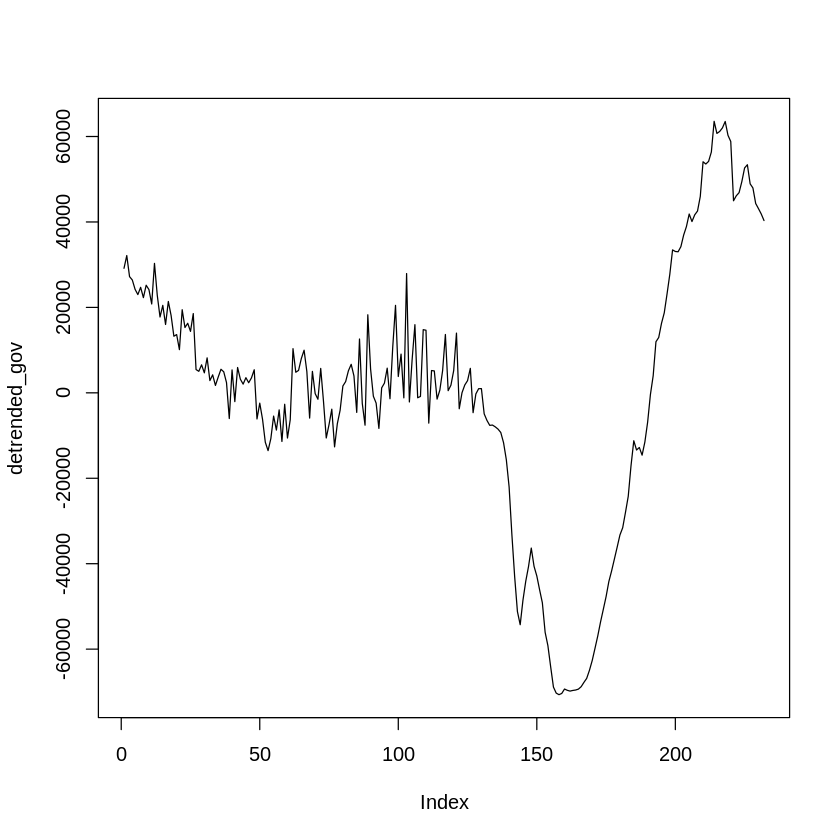

In [ ]:
#Diagnostics for government spending

gov_sample <- gov[which(gov$year < 2018),]
gov_sample$t <- 1:nrow(gov_sample)

time_trend_reg4 <- lm(gov ~ t, data = gov_sample)
stargazer(time_trend_reg4, type = "text")
#96% explained by time

detrended_gov <- time_trend_reg4$residuals
plot(detrended_gov, type = "l")
#still shows trends in data (sharp downward dip and increase)


In [ ]:

#testing for unit root

adf.test(gov_sample$gov, k = 4)
adf.test(detrended_gov, k = 4)
#both show evidence of a unit root, same p value of 0.914


	Augmented Dickey-Fuller Test

data:  gov_sample$gov
Dickey-Fuller = -1.1414, Lag order = 4, p-value = 0.914
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  detrended_gov
Dickey-Fuller = -1.1414, Lag order = 4, p-value = 0.914
alternative hypothesis: stationary


#Differencing



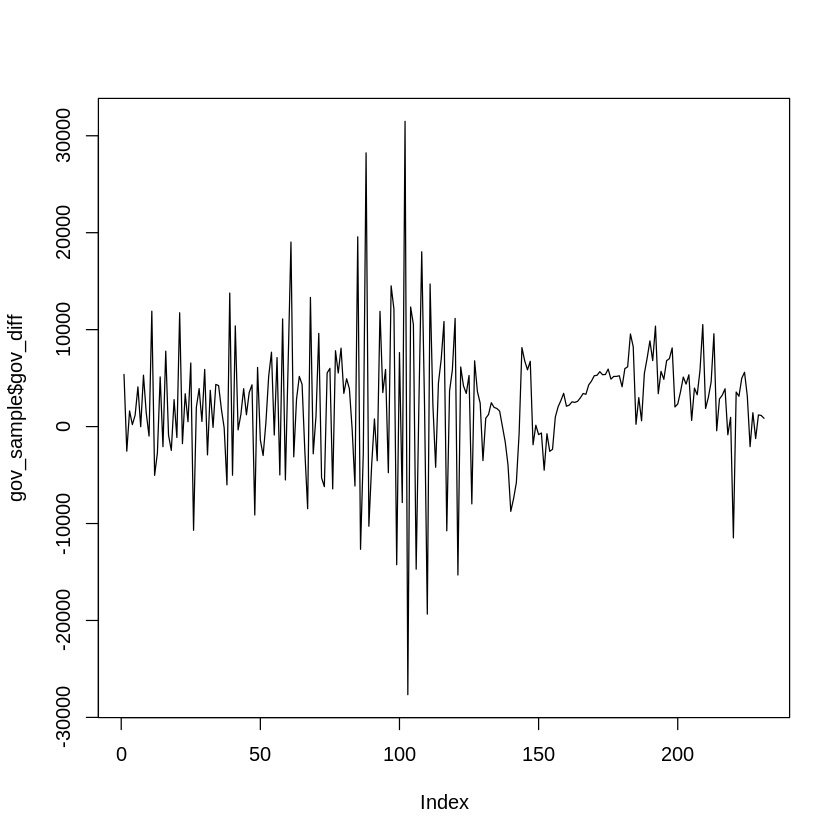

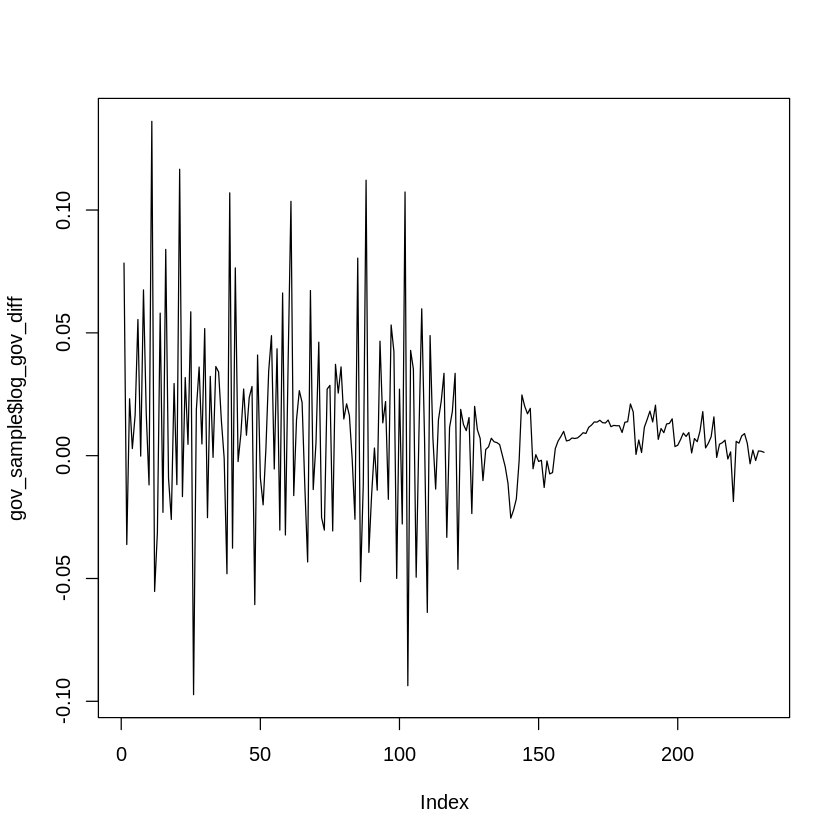

In [ ]:
gov_sample$gov_diff <- gov_sample$gov - dplyr::lag(gov_sample$gov, 1)
gov_sample$log_gov_diff <- log(gov_sample$gov) - dplyr::lag(log(gov_sample$gov), 1)

gov_sample <- gov_sample[-1,]

plot(gov_sample$gov_diff, type = "l")
plot(gov_sample$log_gov_diff, type = "l")
#variance decreases over time


#

In [ ]:
# Test

adf.test(gov_sample$gov_diff, k = 4)
adf.test(gov_sample$log_gov_diff, k = 4)

#now p value < 0.01

Warning message in adf.test(gov_sample$gov_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gov_sample$gov_diff
Dickey-Fuller = -5.6116, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(gov_sample$log_gov_diff, k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  gov_sample$log_gov_diff
Dickey-Fuller = -6.8386, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


## Merging

In [ ]:

regression_data <- gdp_sample
regression_data$inv_sample <- inv_sample
regression_data$cons_sample <- cons_sample
regression_data$gov_sample <- gov_sample


In [ ]:
################################################################################
#
# Estimating first model
#
################################################################################



gdp_sample$log_gdp_diff_1 <- dplyr::lag(gdp_sample$log_gdp_diff, 1) 
gdp_sample$log_gdp_diff_2 <- dplyr::lag(gdp_sample$log_gdp_diff, 2) 
gdp_sample$log_gdp_diff_3 <- dplyr::lag(gdp_sample$log_gdp_diff, 3) 
gdp_sample$log_gdp_diff_4 <- dplyr::lag(gdp_sample$log_gdp_diff, 4) 
gdp_sample$log_gdp_diff_5 <- dplyr::lag(gdp_sample$log_gdp_diff, 5) 



# Estimate model

ar4 <- lm(log_gdp_diff ~ log_gdp_diff_1 + log_gdp_diff_2 + log_gdp_diff_3 + log_gdp_diff_4, data = gdp_sample)
ar3 <- lm(log_gdp_diff ~ log_gdp_diff_1 + log_gdp_diff_2 + log_gdp_diff_3, data = gdp_sample)
ar5 <- lm(log_gdp_diff ~ log_gdp_diff_1 + log_gdp_diff_2 + log_gdp_diff_3 + log_gdp_diff_4 + log_gdp_diff_5, data = gdp_sample)


stargazer(ar4, type = "text")

#1 and 4 not significant


BIC(ar4)
BIC(ar3)
BIC(ar5)


                        Dependent variable:    
                    ---------------------------
                           log_gdp_diff        
-----------------------------------------------
log_gdp_diff_1                 0.049           
                              (0.067)          
                                               
log_gdp_diff_2               0.306***          
                              (0.066)          
                                               
log_gdp_diff_3                0.146**          
                              (0.066)          
                                               
log_gdp_diff_4                -0.091           
                              (0.067)          
                                               
Constant                     0.004***          
                              (0.001)          
                                               
-----------------------------------------------
Observations                    227    

[1] -1427.385

[1] -1438.118

[1] -1416.7

In [ ]:
# T test for serial correlation

ar4_sc <- lm(ar4$residuals ~ dplyr::lag(ar4$residuals, 1))
stargazer(ar4_sc, type = "text")
ar4_sc_summary <- summary(ar4_sc)

# Calculate t-statistic

ar4_sc_summary$coefficients[2,1]/ar4_sc_summary$coefficients[2,2]

# t = 0.003, no serial correlation




################################################################################
#
# Estimating ARDL(2,2,2) model
#
################################################################################

install.packages("dynamac")
library(dynamac)


inv_sample$log_inv_diff_1 <- dplyr::lag(inv_sample$log_inv_diff,1)
inv_sample$log_inv_diff_2 <- dplyr::lag(inv_sample$log_inv_diff,2)
inv_sample$log_inv_diff_3 <- dplyr::lag(inv_sample$log_inv_diff,3)
inv_sample$log_inv_diff_4 <- dplyr::lag(inv_sample$log_inv_diff,4)

cons_sample$log_cons_diff_1 <- dplyr::lag(cons_sample$log_cons_diff, 1)
cons_sample$log_cons_diff_2 <- dplyr::lag(cons_sample$log_cons_diff, 2)
cons_sample$log_cons_diff_3 <- dplyr::lag(cons_sample$log_cons_diff, 3)
cons_sample$log_cons_diff_4 <- dplyr::lag(cons_sample$log_cons_diff, 4)


full_dataset$log_gdp_diff <- gdp_sample$log_gdp_diff
full_dataset$log_gdp_diff_1 <- log_gdp_diff_1

ardl222 <- dynardl(log_gdp_diff ~ log)

ardl222 <- lm(log_gdp_diff ~ log_gdp_diff_1 + log_gdp_diff_2 + log_inv_diff_1 + log_inv_diff_2 + log_cons_diff_1 + log_cons_diff_2, data = full_dataset)


                        Dependent variable:    
                    ---------------------------
                             residuals         
-----------------------------------------------
residuals, 1)                 0.0002           
                              (0.067)          
                                               
Constant                      0.0001           
                              (0.001)          
                                               
-----------------------------------------------
Observations                    226            
R2                            0.00000          
Adjusted R2                   -0.004           
Residual Std. Error      0.010 (df = 224)      
F Statistic            0.00001 (df = 1; 224)   
Note:               *p<0.1; **p<0.05; ***p<0.01


[1] 0.00306646

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored